## 2024 CVE CNA Data Review 

In [13]:
%%capture
!wget https://raw.githubusercontent.com/CVEProject/cve-website/dev/src/assets/data/CNAsList.json
#!rm nvd.jsonl
#!wget -q https://nvd.handsonhacking.org/nvd.jsonl

In [34]:
from IPython.core.magic import register_cell_magic
from IPython.display import Markdown
import calplot
import datetime
from datetime import date
import glob
import json
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings


In [35]:
row_accumulator = []
for filename in glob.glob('nvd.jsonl'):
    with open(filename, 'r', encoding='utf-8') as f:
        nvd_data = json.load(f)
        for entry in nvd_data:
            cve = entry['cve']['id']
            try:
                assigner = entry['cve']['sourceIdentifier']
            except KeyError:
                assigner = 'Missing_Data'
            try:
                published_date = entry['cve']['published']
            except KeyError:
                published_date = 'Missing_Data'
            try:
                attack_vector = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['attackVector']
            except KeyError:
                attack_vector = 'Missing_Data'
            try:
                attack_complexity = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['attackComplexity']
            except KeyError:
                attack_complexity = 'Missing_Data'
            try:
                privileges_required = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['privilegesRequired']
            except KeyError:
                privileges_required = 'Missing_Data'
            try:
                user_interaction = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['userInteraction']
            except KeyError:
                user_interaction = 'Missing_Data'
            try:
                scope = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['scope']
            except KeyError:
                scope = 'Missing_Data'
            try:
                confidentiality_impact = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['confidentialityImpact']
            except KeyError:
                confidentiality_impact = 'Missing_Data'
            try:
                integrity_impact = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['integrityImpact']
            except KeyError:
                integrity_impact = 'Missing_Data'
            try:
                availability_impact = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['availabilityImpact']
            except KeyError:
                availability_impact = 'Missing_Data'
            try:
                base_score = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['baseScore']
            except KeyError:
                base_score = '0.0'
            try:
                base_severity = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['baseSeverity']
            except KeyError:
                base_severity = 'Missing_Data'
            try:
                exploitability_score = entry['cve']['metrics']['cvssMetricV31'][0]['exploitabilityScore']
            except KeyError:
                exploitability_score = 'Missing_Data'
            try:
                impact_score = entry['cve']['metrics']['cvssMetricV31'][0]['impactScore']
            except KeyError:
                impact_score = 'Missing_Data'
            try:
                cwe = entry['cve']['weaknesses'][0]['description'][0]['value']
            except KeyError:
                cwe = 'Missing_Data'
            try:
                description = entry['cve']['descriptions'][0]['value']
            except IndexError:
                description = ''
            try: 
                vulnStatus = entry['cve']['vulnStatus']
            except IndexError:
                vulnStatus = ''  
            new_row = {
                'CVE': cve,
                'Published': published_date,
                'AttackVector': attack_vector,
                'AttackComplexity': attack_complexity,
                'PrivilegesRequired': privileges_required,
                'UserInteraction': user_interaction,
                'Scope': scope,
                'ConfidentialityImpact': confidentiality_impact,
                'IntegrityImpact': integrity_impact,
                'AvailabilityImpact': availability_impact,
                'BaseScore': base_score,
                'BaseSeverity': base_severity,
                'ExploitabilityScore': exploitability_score,
                'ImpactScore': impact_score,
                'CWE': cwe,
                'Description': description,
                'Assigner' : assigner,
                'Status': vulnStatus 
            }
            row_accumulator.append(new_row)
        nvd = pd.DataFrame(row_accumulator)

nvd = nvd[~nvd.Status.str.contains('Rejected')]
nvd['Published'] = pd.to_datetime(nvd['Published'])
thisyear = ((nvd['Published'] > '2024-01-01') & (nvd['Published']  < '2025-01-01'))
nvd = nvd.loc[thisyear]
nvd = nvd.sort_values(by=['Published'])
nvd = nvd.reset_index(drop=True)
nvd['BaseScore'] = pd.to_numeric(nvd['BaseScore']);
nvd['BaseScore'] = pd.to_numeric(nvd['BaseScore']);
nvd['BaseScore'] = nvd['BaseScore'].replace(0, np.nan);
nvdcount = nvd['Published'].count()
nvdunique = nvd['Published'].nunique()
startdate = date(2024, 1, 1)
enddate  = date(2025,1,1)
numberofdays = enddate - startdate 
per_day = nvdcount/numberofdays.days

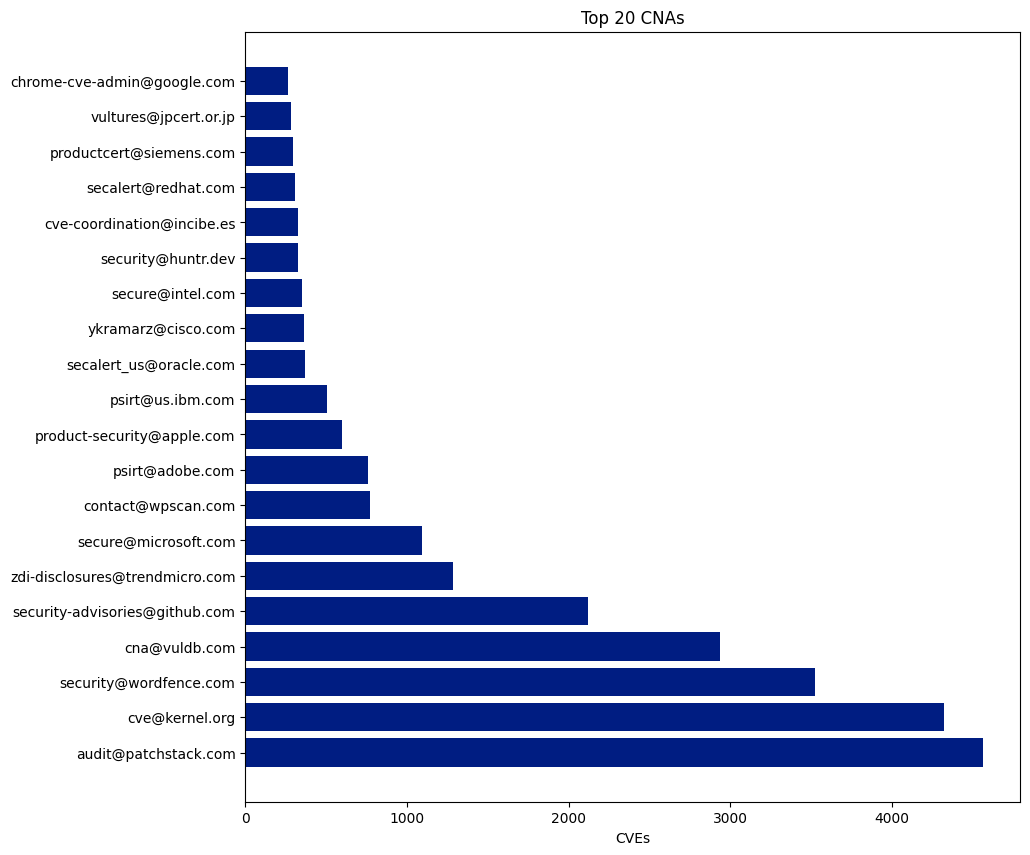

In [36]:
nvd['Assigner'].replace('416baaa9-dc9f-4396-8d5f-8c081fb06d67','cve@kernel.org',inplace=True)
nvd_frequency = nvd['Assigner'].value_counts()
nvd_frequency = nvd_frequency.reset_index()
nvd_frequency.columns = ['Assigner', 'Count']
nvd_frequency['Percentage'] = ( nvd_frequency['Count'] / 
                       nvd_frequency['Count'].sum()) * 100

nvd_frequency_no_mitre = nvd_frequency[~nvd_frequency.Assigner.str.contains('cve@mitre.org')]
nvd_frequency_no_mitre = nvd_frequency_no_mitre[nvd_frequency_no_mitre.Count > 100].head(20)
plt.figure(figsize=(10,10))
plt.barh("Assigner", "Count", data = nvd_frequency_no_mitre, color="#001d82")
plt.xlabel("CVEs"); 
plt.ylabel("") ;
plt.title("Top 20 CNAs");

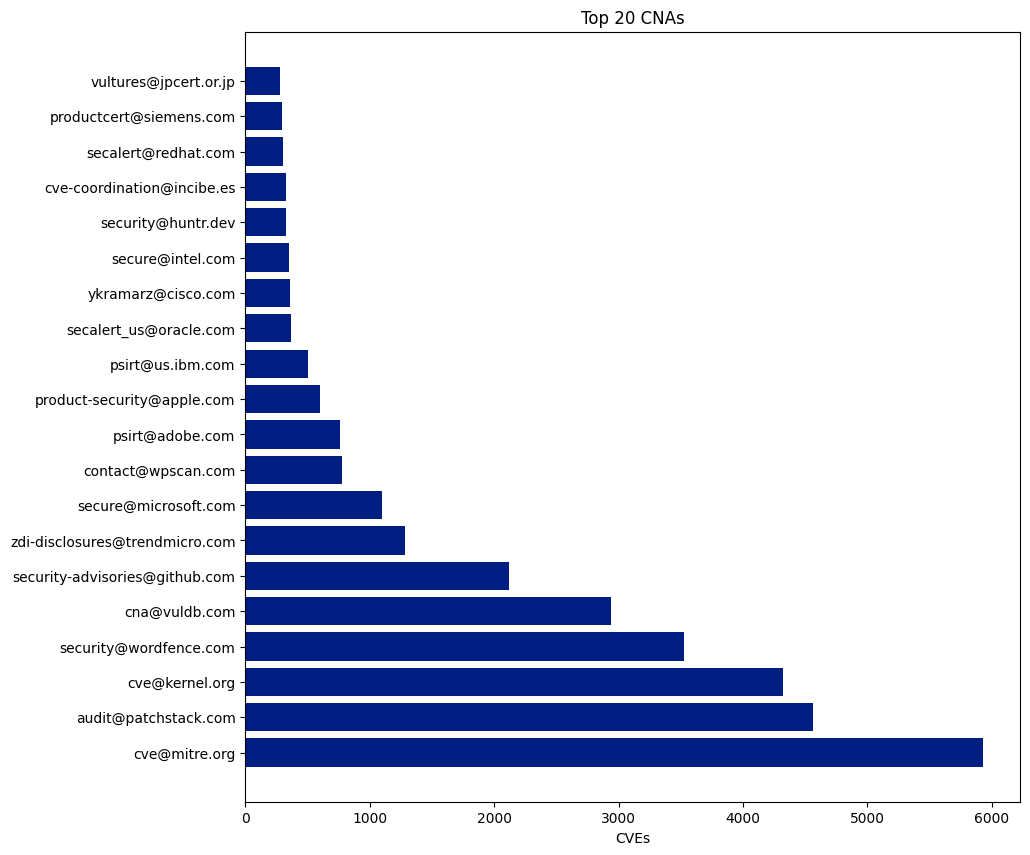

In [37]:
nvd_frequency_graph = nvd_frequency[nvd_frequency.Count > 100].head(20)
plt.figure(figsize=(10,10))
plt.barh("Assigner", "Count", data = nvd_frequency_graph, color="#001d82")
plt.xlabel("CVEs"); 
plt.ylabel("") ;
plt.title("Top 20 CNAs");

In [44]:
nvd_frequency.round(2)

Assigner  Count  Percentage
0                           cve@mitre.org   5932       14.83
1                    audit@patchstack.com   4566       11.41
2                          cve@kernel.org   4325       10.81
3                  security@wordfence.com   3525        8.81
4                           cna@vuldb.com   2936        7.34
..                                    ...    ...         ...
300                       security@1e.com      1        0.00
301  88ee5874-cf24-4952-aea0-31affedb7ff2      1        0.00
302  33c584b5-0579-4c06-b2a0-8d8329fcab9c      1        0.00
303  a14582b7-06f4-4d66-8e82-3d7ba3739e88      1        0.00
304  0a72a055-908d-47f5-a16a-1f09049c16c6      1        0.00

[305 rows x 3 columns]

In [45]:

with open('CNAsList.json') as f:
    data = json.load(f)

cna_emails = pd.json_normalize(data=data, record_path=['contact', 'email'])
all_cna_emails = cna_emails['emailAddr'].to_list()
published_cna_emails = nvd_frequency['Assigner'].to_list()


## Not Published

In [46]:
not_pulished = list(set(all_cna_emails).symmetric_difference(set(published_cna_emails)))
not_pulished = pd.DataFrame(not_pulished)
not_pulished

0
Loading ITables v2.2.4 from the internet... (need help?)


## Not Listed

In [47]:
s = set(published_cna_emails)
not_used = [x for x in all_cna_emails if x not in s]
not_used = pd.DataFrame(not_used)
not_used.reset_index()
not_used.rename(columns={0:'Email Address'}, inplace=True)
not_used


Email Address
Loading ITables v2.2.4 from the internet... (need help?)


In [48]:

s = set(all_cna_emails)
not_listed_list = [x for x in published_cna_emails if x not in s]
not_listed = pd.DataFrame(not_listed_list)
not_listed.reset_index()
not_listed.rename(columns={0:'Email Address'}, inplace=True)
not_listed_count = nvd_frequency[nvd_frequency['Assigner'].isin(not_listed_list)]
not_listed_count = not_listed_count.round(2)
not_listed_count

Assigner  Count  Percentage
0                           cve@mitre.org   5932       14.83
3                  security@wordfence.com   3525        8.81
13                     ykramarz@cisco.com    361        0.90
15                     security@huntr.dev    328        0.82
19                  vultures@jpcert.or.jp    281        0.70
..                                    ...    ...         ...
299  cb7ba516-3b07-4c98-b0c2-715220f1a8f6      1        0.00
301  88ee5874-cf24-4952-aea0-31affedb7ff2      1        0.00
302  33c584b5-0579-4c06-b2a0-8d8329fcab9c      1        0.00
303  a14582b7-06f4-4d66-8e82-3d7ba3739e88      1        0.00
304  0a72a055-908d-47f5-a16a-1f09049c16c6      1        0.00

[123 rows x 3 columns]